In [1]:
import pandas as pd
import numpy as np
# For reproducibility
np.random.seed(0)

df = pd.read_csv('bank-full.csv', sep=';')
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

var_names = X.columns
num_vars = []
for var in var_names:
    if X[var].dtype == 'int64':
        num_vars.append(var)
print(num_vars)
print(Y.value_counts())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
no     39922
yes     5289
Name: y, dtype: int64


<ipython-input-2-98628e6d91b1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(list(df[var].unique()), rotation = 15, ha='right')


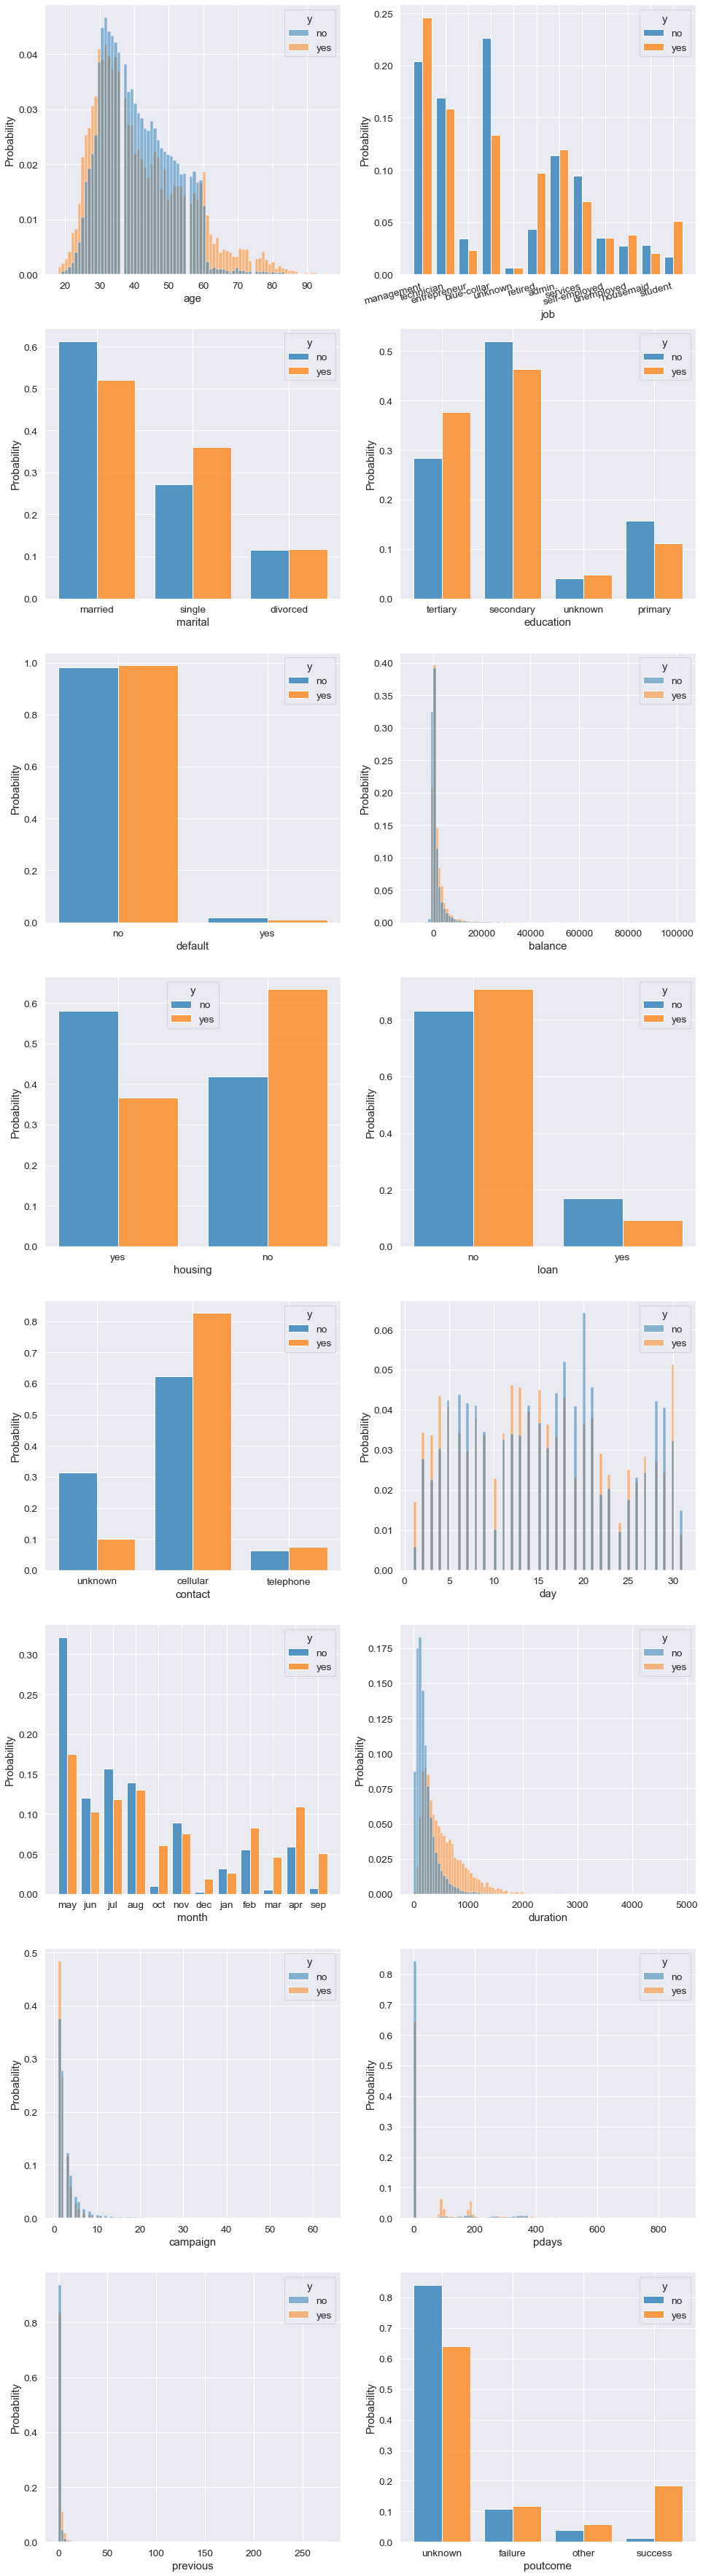

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

def numberic_plot(var, data, ax):
    if data[var].dtype == 'int64':
        g = sns.histplot(
            x=var,
            hue=data.columns[-1],
            # for ease of visualisation, display only 100 bins
            binwidth=data[var].max()/100,
            stat="probability",
            # normalize each density independently
            common_norm = False,
            data=data,
            ax=ax
        )
    else:
        g = sns.histplot(
            x=var,
            hue=data.columns[-1], 
            multiple="dodge",
            stat="probability",
            shrink=0.8,
            # normalize each density independently
            common_norm = False,
            data=data,
            ax=ax
        )
        if var == 'job':
            g.set_xticklabels(list(df[var].unique()), rotation = 15, ha='right')
    g.figure.savefig('distribution' + var + '.png')
    return g


fig, axes = plt.subplots(8, 2, figsize=(16, 8*8))
ax = axes.ravel()
i = 0
for var in var_names:
    g = numberic_plot(var, df, ax[i])
    i += 1

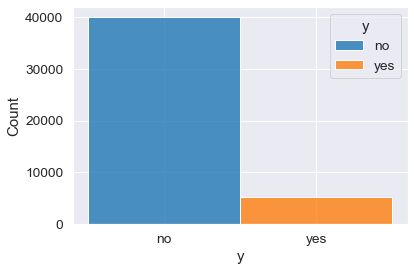

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
fig, ax = plt.subplots()
sns.histplot(
            x='y',
            hue=df.columns[-1], 
            alpha = 0.8,
            data=df,
            ax=ax
        )
plt.savefig('y.png')